### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

In general, the independent variable is the variable that stands alone and is not changed by the other variables you are trying to measure (1). Therefore in this experiment, the independent variable is related to the display of the text. 

On the other hand, the dependent variable something that depends on other factors (1). So, here the dependent variable is how much time do you take to name the font color. On another word, it is the reaction time to name the font color correctly 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

This experiment will check if the response time will be increase when the color is not matching the text. 
There are two type of Hypothesis:

1. Null Hypothesis: the congruent and incongruent population mean will not affect the response time in order to recognize the color by making the mean of both coditions response time equal. 
    
    H0: μi = μc where μi - population mean of incongruent response time, μc - population mean of congruent response time 


2. Alternate Hypothesis: the incongruent population mean will be greater than the congruent population mean  
    HA:  μI > μC

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [8]:
# Perform the analysis here
# Importing the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *

%matplotlib inline

In [9]:
# Reading the database 
stroop_pd = pd.read_csv("stroopdata.csv")

In [10]:
stroop_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [11]:
# descriptive statistics 
stroop_pd.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The mean of the Congruent is 14.051125 whereas the mean of the Incongruent is 22.015917

The median of the Congruent is 14.356500 whereas the median of the Incongruent is 21.017500

The STD of the Congruent is 3.559358 whereas the STD of the Incongruent is 4.797057

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

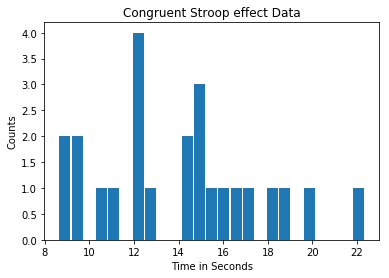

In [12]:
# Build the visualizations here
# visualizations of the Congruent data
plt.title('Congruent Stroop effect Data')
plt.xlabel('Time in Seconds')
plt.ylabel('Counts')
plt.hist(stroop_pd['Congruent'], rwidth = 0.9, bins =25)
plt.show()

As we can sww from the Congruent plot that most of stakeholders took between 12 to 15 seconds to complete the first part of the experiment.

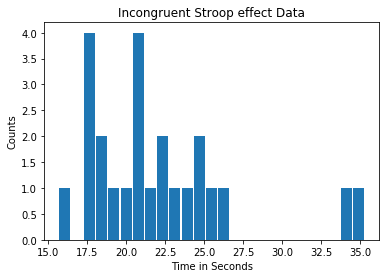

In [13]:
# visualizations of the Incongruent data
plt.title('Incongruent Stroop effect Data')
plt.xlabel('Time in Seconds')
plt.hist(stroop_pd['Incongruent'], rwidth = 0.9, bins =25)
plt.ylabel('Counts')
plt.show()

As we can sww from the Incongruent plot that most of stakeholders took between 17 to 21 seconds to complete the second part of the experiment. This means that they need more time to recognice the color correctly.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [22]:
# Perform the statistical test here
congruent = stroop_pd["Congruent"]
incongruent = stroop_pd["Incongruent"]

# Calculate the difference between Congruent and Incongruent
stroop_pd["Difference"] = abs(stroop_pd["Congruent"] - stroop_pd["Incongruent"])

stroop_pd.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


In [23]:
deff_mean = stroop_pd['Difference'].mean()
deff_mean

7.964791666666667

In [24]:
deff_std = stroop_pd['Difference'].std()
deff_std

4.864826910359056

In [25]:
# Calaculate the standard error 
std_error = deff_std/sqrt(len(stroop_pd))
std_error

0.9930286347783406

In [26]:
# Finding t statistic 
t = deff_mean / std_error
t

8.020706944109957

In [38]:
# Finding p value 
from scipy import stats

p_value = stats.ttest_rel(stroop_pd["Congruent"], stroop_pd["Incongruent"])
p_value

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

In [27]:
# degrees of freedom
df =  len(stroop_pd) - 1
df

23

I used t-test instead of a z-test because the total number of my sample is 24 where z-test needs large samples more than 30. it is independent test by finding statistically difference between the means of two samples. 

I am comparing the average values of the two data sets and establishes the problem statement by assuming a null hypothesis of the two means are equal.  

- T_critical = 1.714 
- Alpha: 0.05

- T_statistic = 8.020
- p_value = 4.103000585711178e-08 = 0.00000004103000585711178

As We can see that T_statistic is larger than T_critical and the p_value is less than the significance level (α). So, the null is rejected and alternative hypotheses is accepted. The results match my expectations

References: 

(1) https://nces.ed.gov/nceskids/help/user_guide/graph/variables.asp